# Seaborn Multiples
Tutorial: https://seaborn.pydata.org/tutorial/axis_grids.html  
API: https://seaborn.pydata.org/api.html#grid-api

Agenda:
- Pairplot: https://seaborn.pydata.org/generated/seaborn.pairplot.html


  
  
McKinney, Ch9: https://learning.oreilly.com/library/view/python-for-data/9781491957653/ch09.html  
  
More pairplot examples: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166  
  

## Macrodata

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
macro = pd.read_csv('data/macrodata.csv')
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


***cpi*** - a Consumer Price Index, measures changes in the price level of market basket of consumer goods and services purchased by households.  
  
***m1*** - the money supply is the entire stock of currency and other liquid instruments circulating in a country's economy as of a particular time. The money supply can include cash, coins and balances held in checking and savings accounts.  
  
***tbilrate***.  A Treasury Bill is a short-term debt obligation backed by the Treasury Department of the U.S. government with a maturity of less than one year.  Treasury yield is the return on investment, expressed as a percentage, on the U.S. government's debt obligations.

***unemp*** - unemployment rate for the nation is the number of unemployed as a percentage of the labor force (the sum of the employed and unemployed).

In [64]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


**numpy.log()** is the natural logarithm is logarithm in base e, element-wise.

In [65]:
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


## Pairplot

**pairplot** is a special kind of FacetGrid.  
  
Pairwise relationships between all variables in the input DataFrame will be visualized as scatter plots.  
  
By default, a series of histograms will be displayed along the diagonal axes to show the distribution of the variable in that column/

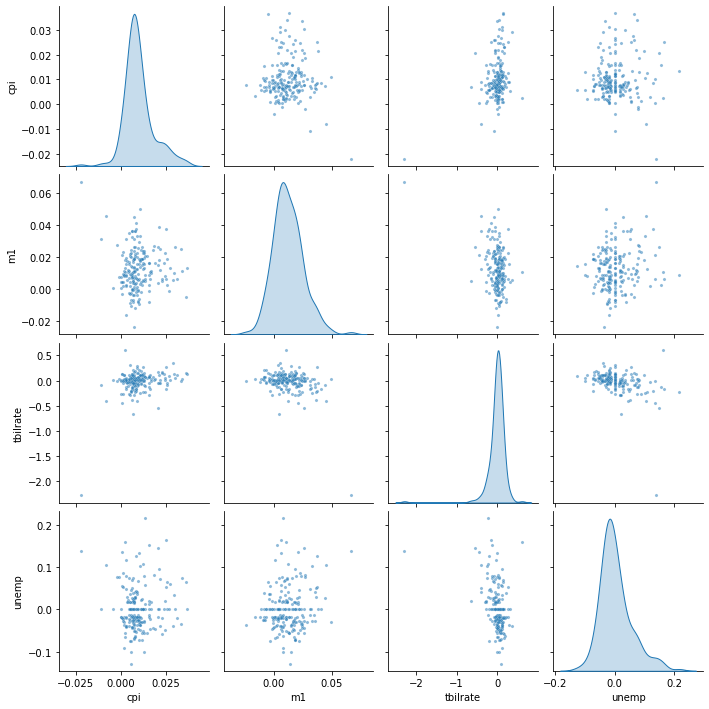

In [66]:
sns.pairplot(trans_data, 
             diag_kind='kde', 
             plot_kws={'alpha': 0.5, 's': 10})

# Quandl  pairplot
## End-of-Day (EOD) stock data
This example is from the book 'Numerical Computing with Python' by  Aldrin Yim; Pratap Dangeti; Claire Chung; Allen Yu.  Published by Packt Publishing, 2018.

In [67]:
from urllib.request import urlopen
import json

In [68]:
def get_quandl_dataset(api_key, code, start_date, end_date):
    """Obtain and parse a quandl dataset in Pandas DataFrame format

    Quandl returns dataset in JSON format, where data is stored as a 
    list of lists in response['dataset']['data'], and column headers
    stored in response['dataset']['column_names'].
           
    Args:
        api_key: Quandl API key
        code: Quandl dataset code

    Returns:
        df: Pandas DataFrame of a Quandl dataset

    """
    base_url = "https://www.quandl.com/api/v3/datasets/"
    url_suffix = ".json?api_key="
    date = "&start_date={}&end_date={}".format(start_date, end_date)
    
    print(base_url + code + url_suffix + api_key + date)
    # Fetch the JSON response 
    u = urlopen(base_url + code + url_suffix + api_key + date)
    response = json.loads(u.read().decode('utf-8'))
    
    # Format the response as Pandas Dataframe
    df = pd.DataFrame(response['dataset']['data'], columns=response['dataset']
    ['column_names'])
       
    return df

# Input your own API key here
api_key = ""

# Quandl code for six US companies: Apple, Procter & Gamble, Johnson & Johnson, Exxon Mobil
codes = ["EOD/MSFT", "EOD/AAPL", "EOD/PG", "EOD/JNJ", "EOD/XOM", "EOD/IBM"]
start_date = "2017-01-01"
end_date = "2017-06-30"

dfs = []
# Get the DataFrame that contains the EOD data for each company
for code in codes:
    df = get_quandl_dataset(api_key, code, start_date, end_date)
    df["Company"] = code[4:]
    dfs.append(df)

# Concatenate all dataframes into a single one
stock_df = pd.concat(dfs)

# Sort by ascending order of Company then Date
stock_df = stock_df.sort_values(["Company","Date"])

# Calculate percentage change versus the previous close
stock_df["Close_change"] = stock_df["Close"].pct_change()
# Since the DataFrame contain multiple companies' stock data, 
# the first record in the "Close_change" should be changed to
# NaN in order to prevent referencing the price of incorrect company.
stock_df.loc[stock_df["Date"]=="2017-01-03", "Close_change"] = np.NaN
stock_df.head()

https://www.quandl.com/api/v3/datasets/EOD/MSFT.json?api_key=AfiK_D2uPhg82xk3VsyP&start_date=2017-01-01&end_date=2017-06-30


HTTPError: HTTP Error 404: Not Found

In [ ]:
# Show a pairplot of three selected variables (vars=["Open", "Volume", "Close"])
g = sns.pairplot(stock_df, 
                 hue="Company", 
                 vars=["Open", "Volume", "Close"])

plt.show()

1e8 is standard scientific notion, here it indicates an overall scale factor for the y-axis. That is, if there's a 2 on the y-axis and a 1e8 at the top, the value at 2 actually indicates 2*1e8 = 2e8 = 2 * 10^8 = 200,000,000.

**Increase aspect ratio** - a proportional relationship between an image's width and height.  
  
Adjust the aesthetics of the plots using keyword arguments:

In [ ]:
sns.pairplot(stock_df, 
             hue="Company", 
             aspect=1.5, 
             diag_kind="kde", 
             diag_kws={'shade': True},
             plot_kws={'s': 15, 'marker': "+"},
             vars=["Open", "Volume", "Close"])

Manually define the comparisons that matter to us instead of an all-versus-all comparison by setting the x_vars and y_vars parameters. 

In [ ]:
# Manually defining the comparisons of interest
sns.pairplot(stock_df, 
             hue="Company", 
             aspect=1.5,
             x_vars=["Open", "Volume"],
             y_vars=["Close", "Close_change"])